In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'../99 Datasets/CAGEDEST_122018.txt', delimiter=';', encoding='ISO-8859-1')

In [3]:
defic = pd.DataFrame({'idade':df['Idade'],
                      'sexo':df['Sexo'],
                      'etnia':df['Raça Cor'],
                      'instrucao':df['Grau Instrução'],
                      'deficiente':df['Ind Portador Defic'],
                      'tipodefic':df['Tipo Defic'],
                      'salario':df['Salário Mensal']})

In [4]:
defic = defic[(defic['tipodefic'] > 0)]

In [5]:
defic.shape

(16572, 7)

In [6]:
defic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16572 entries, 215 to 2256738
Data columns (total 7 columns):
idade         16572 non-null int64
sexo          16572 non-null int64
etnia         16572 non-null int64
instrucao     16572 non-null int64
deficiente    16572 non-null int64
tipodefic     16572 non-null int64
salario       16572 non-null object
dtypes: int64(6), object(1)
memory usage: 1.0+ MB


In [7]:
defic.describe()

,idade,sexo,etnia,instrucao,deficiente,tipodefic
count,16572.000000,16572.000000,16572.000000,16572.000000,16572.0,16572.000000
mean,34.449312,1.377625,5.057567,6.526370,1.0,2.115798
std,11.207164,0.484808,3.005126,1.610371,0.0,1.370147
min,14.000000,1.000000,1.000000,1.000000,1.0,1.000000
25%,25.000000,1.000000,2.000000,6.000000,1.0,1.000000
50%,33.000000,1.000000,4.000000,7.000000,1.0,2.000000
75%,42.000000,2.000000,8.000000,7.000000,1.0,3.000000
max,91.000000,2.000000,9.000000,9.000000,1.0,6.000000


In [8]:
defic['sexo'] = defic['sexo'].replace({1: 'Masculino',
                                       2: 'Feminino'})

defic['etnia'] = defic['etnia'].replace({1: 'Indigena',
                                         2: 'Branca',
                                         4: 'Preta',
                                         6: 'Amarela',
                                         8: 'Parda',
                                         9: 'Nao identificada'})

defic['instrucao'] = defic['instrucao'].replace({1: 'Analfabeto',
                                                 2: 'Até 5ª Incompleto',
                                                 3: '5ª Completo Fundamental',
                                                 4: '6ª a 9ª Fundamental',
                                                 5: 'Fundamental Completo',
                                                 6: 'Médio Incompleto',
                                                 7: 'Médio Completo',
                                                 8: 'Superior Incompleto',
                                                 9: 'Superior Completo'})

defic['tipodefic'] = defic['tipodefic'].replace({1: 'Fisica',
                                                 2: 'Auditiva',
                                                 3: 'Visual',
                                                 4: 'Mental',
                                                 5: 'Multipla',
                                                 6: 'Reabilitado'})

defic['salario'] = defic['salario'].str.replace(',','.')

defic['sexo'] = defic['sexo'].astype(object, errors='raise')
defic['etnia'] = defic['etnia'].astype(object, errors='raise')
defic['instrucao'] = defic['instrucao'].astype(object, errors='raise')
defic['tipodefic'] = defic['tipodefic'].astype(object, errors='raise')
defic['salario'] = defic['salario'].astype(float)

In [9]:
defic.head()

,idade,sexo,etnia,instrucao,deficiente,tipodefic,salario
215,19,Masculino,Branca,Médio Completo,1,Visual,1000.0
352,17,Masculino,Parda,Médio Incompleto,1,Auditiva,1097.0
391,25,Masculino,Parda,6ª a 9ª Fundamental,1,Mental,1095.0
426,24,Masculino,Branca,Médio Completo,1,Auditiva,1095.0
493,19,Masculino,Branca,Médio Incompleto,1,Visual,1185.0


In [10]:
defic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16572 entries, 215 to 2256738
Data columns (total 7 columns):
idade         16572 non-null int64
sexo          16572 non-null object
etnia         16572 non-null object
instrucao     16572 non-null object
deficiente    16572 non-null int64
tipodefic     16572 non-null object
salario       16572 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.0+ MB


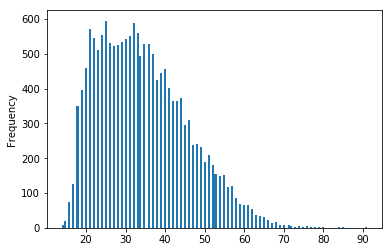

In [11]:
%matplotlib inline
defic['idade'].plot(kind='hist', bins=150)

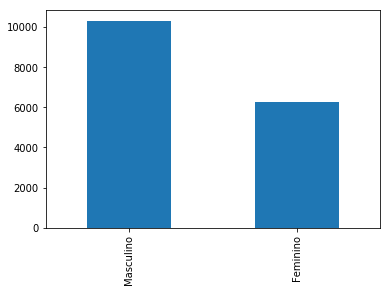

In [12]:
defic['sexo'].value_counts().plot(kind='bar')

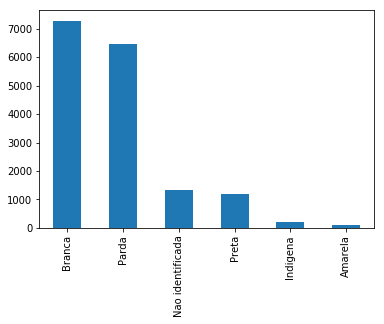

In [13]:
defic['etnia'].value_counts().plot(kind='bar')

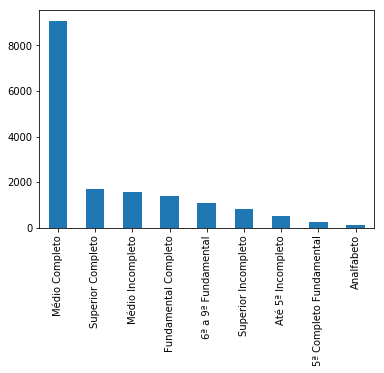

In [14]:
defic['instrucao'].value_counts().plot(kind='bar')

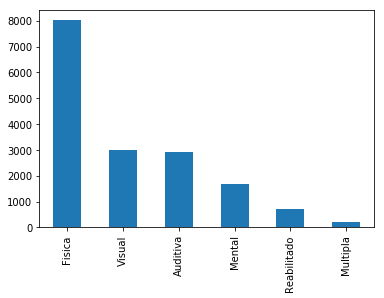

In [15]:
defic['tipodefic'].value_counts().plot(kind='bar')

Hipótese: pessoas com alguma deficiência ganham menos do que a média em geral?

In [16]:
df['Salário Mensal'] = df['Salário Mensal'].str.replace(',','.')
df['Salário Mensal'] = df['Salário Mensal'].astype(float)

media_salario_geral = df['Salário Mensal'].mean()
sigma_salario_geral = df['Salário Mensal'].std()

media_salario_defic = defic['salario'].mean()
sigma_salario_defic = defic['salario'].std()

print(media_salario_geral, sigma_salario_geral)
print(media_salario_defic, sigma_salario_defic)

1627.2442231135722 2097.520546695418
1556.7787834902244 1783.5302869347965


In [18]:
# Calculando o Intervalo de Confiança de 95% de todo o dataset
import scipy.stats as st
limites_salario_geral = st.norm.interval(alpha=0.95, loc=media_salario_geral, scale=sigma_salario_geral)
print(limites_salario_geral)

# Hipótese -> pessoas com alguma deficiência ganham menos do que a média em geral?
# Verificando se o valor médio de salário das pessoas com deficiência é menor do que o limite inferior da média total

print(media_salario_defic)
media_salario_defic < limites_salario_geral[0]

# False -> Mostra que os deficientes ganham estatisticamente igual á media

(-2483.8205052422118, 5738.308951469356)
1556.7787834902244


False